## RQ3: Performance Verification.

1. Merge the tables and Sanity check

In [9]:
import pandas as pd

###############################################################################
# 1. Load raw csv files
###############################################################################

# Edit these paths if needed
bg_path = "../data/RQ2/background_traffic_full.csv"   # background traffic metrics
f1_path = "../data/RQ2/f1res.csv"                # idle and active F1
perf_path = "../data/RQ2/perf.csv"               # per attack performance

bg_df = pd.read_csv(bg_path)
f1_df = pd.read_csv(f1_path)
perf_df = pd.read_csv(perf_path)


###############################################################################
# Normalise device names
###############################################################################

def normalise_device_name(df, col):
    df[col] = df[col].astype(str)
    df["device_clean"] = df[col].str.strip().str.lower()
    return df

bg_df = normalise_device_name(bg_df, "device")
f1_df = normalise_device_name(f1_df, "device")
perf_df = normalise_device_name(perf_df, "device")

###############################################################################
# Convert percent strings to numeric
###############################################################################

def percent_to_float(series):
    return (
        series.astype(str)
        .str.replace("%", "", regex=False)
        .str.strip()
        .replace("", pd.NA)
        .astype(float)
    )

# Convert overall F1
for col in ["f1_idle", "f1_active", "Difference"]:
    f1_df[col] = percent_to_float(f1_df[col])

# Identify attack metrics in perf file
attack_f1_cols = ["icmp_f1", "os_f1", "syn_f1", "scan_f1"]
attack_acc_cols = ["icmp_acc", "os_acc", "syn_acc", "scan_acc"]

# Convert both F1 and Acc
for col in attack_f1_cols + attack_acc_cols:
    perf_df[col] = percent_to_float(perf_df[col])

###############################################################################
# Merge tables
###############################################################################

merged = bg_df.merge(
    f1_df[["device_clean", "f1_idle", "f1_active", "Difference"]],
    on="device_clean",
    how="left"
)

merged = merged.merge(
    perf_df[["device_clean"] + attack_f1_cols + attack_acc_cols],
    on="device_clean",
    how="left"
)

###############################################################################
# Final inspection
###############################################################################

merged.head()


,category,device,pps_idle,pps_var_idle,size_mean_idle,size_var_idle,proto_tls_idle,proto_tcp_idle,proto_udp_idle,proto_mdns_idle,...,f1_active,Difference,icmp_f1,os_f1,syn_f1,scan_f1,icmp_acc,os_acc,syn_acc,scan_acc
0,tv,appletv,0.281912,82.535574,496.079125,210755.020710,0.025253,0.0,0.0,0.606061,...,81.09,11.35,85.62,71.65,79.86,93.77,88.51,76.14,86.36,95.51
1,tv,LGtv,2.629911,110.070541,163.345556,34789.592431,0.080159,0.0,0.0,0.005079,...,77.27,19.89,46.51,71.85,56.84,49.58,50.00,78.89,76.67,63.33
2,tv,samsungtv,11.953214,16446.445547,1021.043294,412940.164006,0.948878,0.0,0.0,0.021106,...,69.32,1.14,57.50,40.40,50.59,44.03,70.33,67.78,71.11,63.74
3,tv,samsungtvsmall,2.483299,31.149502,220.900588,65092.311244,0.168262,0.0,0.0,0.000672,...,81.25,-3.41,64.75,46.62,66.39,54.34,75.82,69.39,79.12,76.92
4,tv,tclroku,0.661172,87.170887,333.181761,178264.241340,0.276124,0.0,0.0,0.368588,...,68.75,18.75,49.89,56.67,71.08,49.25,74.44,69.23,81.11,73.33


In [10]:
merged.columns

Index(['category', 'device', 'pps_idle', 'pps_var_idle', 'size_mean_idle',
       'size_var_idle', 'proto_tls_idle', 'proto_tcp_idle', 'proto_udp_idle',
       'proto_mdns_idle', 'proto_ssdp_idle', 'proto_arp_idle',
       'proto_dhcp_idle', 'proto_other_idle', 'inout_ratio_idle',
       'num_packets_idle', 'burst_count_idle', 'size_kurt_idle',
       'num_flows_idle', 'mean_pkts_per_flow_idle', 'top_flow_frac_idle',
       'flow_entropy_idle', 'num_dst_ips_idle', 'num_dst_ports_idle',
       'iat_mean_idle', 'iat_var_idle', 'pps_active', 'pps_var_active',
       'size_mean_active', 'size_var_active', 'proto_tls_active',
       'proto_tcp_active', 'proto_udp_active', 'proto_mdns_active',
       'proto_ssdp_active', 'proto_arp_active', 'proto_dhcp_active',
       'proto_other_active', 'inout_ratio_active', 'num_packets_active',
       'burst_count_active', 'size_kurt_active', 'num_flows_active',
       'mean_pkts_per_flow_active', 'top_flow_frac_active',
       'flow_entropy_active', 'n

In [11]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   33 non-null     object 
 1   device                     33 non-null     object 
 2   pps_idle                   33 non-null     float64
 3   pps_var_idle               33 non-null     float64
 4   size_mean_idle             33 non-null     float64
 5   size_var_idle              33 non-null     float64
 6   proto_tls_idle             33 non-null     float64
 7   proto_tcp_idle             33 non-null     float64
 8   proto_udp_idle             33 non-null     float64
 9   proto_mdns_idle            33 non-null     float64
 10  proto_ssdp_idle            33 non-null     float64
 11  proto_arp_idle             33 non-null     float64
 12  proto_dhcp_idle            33 non-null     float64
 13  proto_other_idle           33 non-null     float64
 

2. Global Correlation Matrix

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1624: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


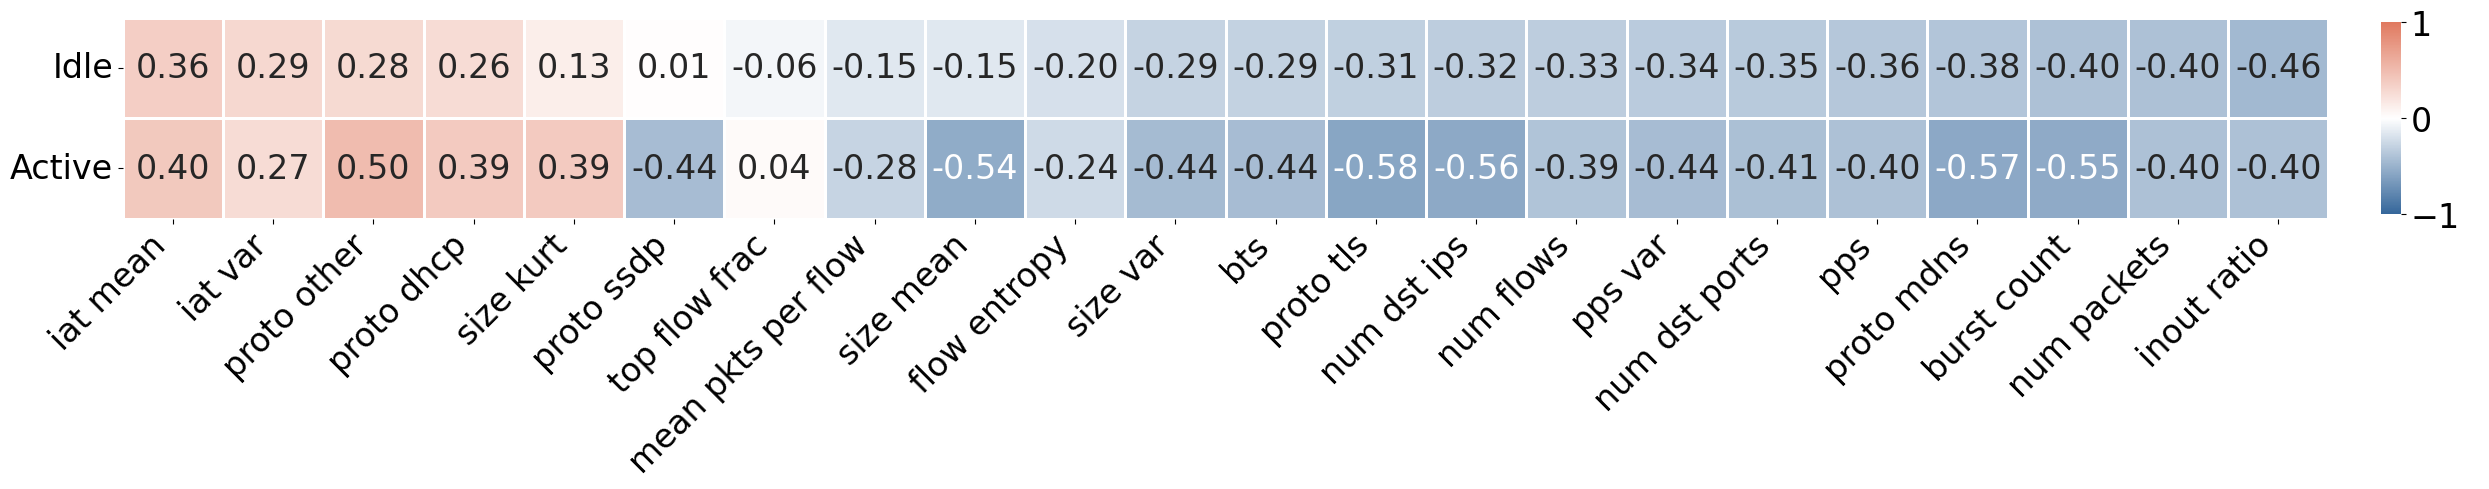

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

def plot_horizontal_correlation_comparison(df, filename="../data/figs/horizontal_corr_comparison.pdf"):
    """
    Generates a horizontal 2-row heatmap comparing Idle vs Active feature correlations.
    """
    # 1. Identify Numeric Columns & Targets
    target_idle = "f1_idle"
    target_active = "f1_active"
    
    # Get all numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Extract base feature names by stripping _idle / _active
    # We look for features that exist in BOTH states to compare them
    idle_candidates = [c.replace('_idle', '') for c in numeric_cols if c.endswith('_idle') and c != target_idle]
    active_candidates = [c.replace('_active', '') for c in numeric_cols if c.endswith('_active') and c != target_active]
    
    # Intersection: features present in both
    base_features = sorted(list(set(idle_candidates).intersection(active_candidates)))
    
    # 2. Calculate Correlations
    corr_data = {}
    
    for base in base_features:
        # Get specific column names
        col_idle = f"{base}_idle"
        col_active = f"{base}_active"
        
        # Calculate Spearman correlation with respective targets
        c_idle = df[col_idle].corr(df[target_idle], method='spearman')
        c_active = df[col_active].corr(df[target_active], method='spearman')
        
        corr_data[base] = {'Idle': c_idle, 'Active': c_active}
        
    # Create DataFrame (Rows = Features initially, then we Transpose)
    corr_df = pd.DataFrame.from_dict(corr_data, orient='index')
    corr_df = corr_df.dropna(how='any')

    # Sort by 'Idle' correlation strength (Descending) to organize the X-axis
    corr_df = corr_df.sort_values(by='Idle', ascending=False)
    
    # Transpose so Rows = State, Cols = Features
    plot_data = corr_df.T 
    
    # 3. Setup Plotting
    # Width depends on number of features (approx 0.8 inch per feature), Height is fixed small
    # plt.figure(figsize=(len(base_features) * 1.0, 3.5)) 
    plt.figure(figsize=(28, 5)) 
    
    # Custom Blue-White-Orange Colormap (#f3a361)
    colors = ["#34669a", "#ffffff", "#e0795f"] 
    cmap = LinearSegmentedColormap.from_list("custom_blue_orange", colors, N=256)
    
    # 4. Draw Heatmap
    ax = sns.heatmap(
        plot_data,
        cmap=cmap,
        vmin=-1, vmax=1, center=0,
        linewidths=1.0, linecolor='white',
        annot=True,              # Show numbers
        fmt=".2f",               # 2 decimal places
        square=True,             # Force square blocks
        annot_kws={"size": 24, "weight": "normal"}, # Font inside blocks
        cbar_kws={
            'label': ' ', 
            'shrink': 0.6, 
            'aspect': 10,
            'pad': 0.02
        }
    )

    # 5. Styling Labels (The "Da Da Da" Style)
    
    # Y-Axis (Rows: Idle, Active)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=24, fontweight='normal', va='center')
    
    # X-Axis (Bottom: Feature Names)
    # Clean up underscores
    clean_x_labels = [l.get_text().replace('_', ' ') for l in ax.get_xticklabels()]
    ax.set_xticklabels(clean_x_labels, rotation=45, ha='right', fontsize=24, fontweight='normal')
    
    # Colorbar Label
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=24)
    #cbar.set_label('Correlation Strength', size=0)

    #plt.title("Feature Correlation with F1 Score: Idle vs. Active", fontsize=24, pad=20)
    plt.tight_layout()
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Run the function
# Assuming 'merged' is your dataframe
plot_horizontal_correlation_comparison(merged)

In [13]:
import pandas as pd
from scipy.stats import spearmanr

def conditional_corr(df, feat, target, min_n=5):
    mask = df[feat] != 0
    sub = df[mask]
    if len(sub) < min_n:
        return None, None, len(sub)
    r, p = spearmanr(sub[feat], sub[target])
    return r, p, len(sub)

results = []

target_idle = "f1_idle"
target_active = "f1_active"

# extract features that have idle/active pairs
numeric_cols = merged.select_dtypes(include=["float64", "int64"]).columns
idle_bases = {c.replace("_idle","") for c in numeric_cols if c.endswith("_idle")}
active_bases = {c.replace("_active","") for c in numeric_cols if c.endswith("_active")}
base_features = sorted(list(idle_bases.intersection(active_bases)))

for base in base_features:
    feat_idle = base + "_idle"
    feat_active = base + "_active"
    
    # global
    r_idle_g = merged[feat_idle].corr(merged[target_idle], method="spearman")
    r_active_g = merged[feat_active].corr(merged[target_active], method="spearman")
    
    # conditional
    r_idle_c, p_idle_c, n_idle = conditional_corr(merged, feat_idle, target_idle)
    r_active_c, p_active_c, n_active = conditional_corr(merged, feat_active, target_active)
    
    results.append([
        base.replace("_"," "),
        r_idle_g, r_idle_c,
        r_active_g, r_active_c
    ])

df_compare = pd.DataFrame(results, columns=[
    "Feature", 
    "Idle global r", "Idle nonzero r",
    "Active global r", "Active nonzero r"
])

print(df_compare)


               Feature  Idle global r  Idle nonzero r  Active global r  \
0                  bts      -0.291093       -0.291093        -0.435692   
1          burst count      -0.402223       -0.327887        -0.551297   
2                   f1       1.000000        1.000000         1.000000   
3         flow entropy      -0.202069       -0.202069        -0.241010   
4             iat mean       0.360297        0.360297         0.398729   
5              iat var       0.291093        0.291093         0.265429   
6          inout ratio      -0.456544       -0.456544        -0.401572   
7   mean pkts per flow      -0.151174       -0.151174        -0.279311   
8          num dst ips      -0.323959       -0.323959        -0.558006   
9        num dst ports      -0.347415       -0.347415        -0.408920   
10           num flows      -0.325879       -0.325879        -0.389689   
11         num packets      -0.403633       -0.403633        -0.398729   
12                 pps      -0.360297 

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1624: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


In [14]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming 'merged' is your main DataFrame
df = merged.copy()

# 1. Identify base feature names
idle_base = [c.replace("_idle", "") 
             for c in df.columns 
             if c.endswith("_idle") and c != "f1_idle"]

active_base = [c.replace("_active", "") 
               for c in df.columns 
               if c.endswith("_active") and c != "f1_active"]

# Find common features existing in both states
common = sorted(list(set(idle_base).intersection(active_base)))

rows = []

for base in common:
    fi = f"{base}_idle"
    fa = f"{base}_active"
    
    # Calculate Spearman correlation for both states
    r_idle, p_idle = spearmanr(df[fi], df["f1_idle"])
    r_active, p_active = spearmanr(df[fa], df["f1_active"])
    
    # Skip if calculation failed (NaN)
    if pd.isna(r_idle) or pd.isna(r_active):
        continue

    rows.append({
        "feature": base,
        "r_idle": r_idle,
        "p_idle": p_idle,
        "r_active": r_active,
        "p_active": p_active,
        "abs_r_idle": abs(r_idle),
        "abs_r_active": abs(r_active),
        # Delta: How much stronger is the correlation in Active state?
        "masking_delta": abs(r_active) - abs(r_idle)
    })

results = pd.DataFrame(rows)

# ---------------------------------------------------------
# ANALYSIS 1: ROBUST PREDICTORS (The Baseline)
# Features significant (p < 0.05) in BOTH states.
# These determine the device's default "detectability".
# ---------------------------------------------------------
robust_features = results[
    (results["p_idle"] < 0.05) & 
    (results["p_active"] < 0.05)
].sort_values("abs_r_active", ascending=False)

print("=== TOP ROBUST FEATURES (Significant in BOTH states) ===")
print(robust_features[["feature", "r_idle", "r_active", "p_active"]].head(10))
print("\n" + "="*60 + "\n")

# ---------------------------------------------------------
# ANALYSIS 2: MASKING FEATURES (The Activity Effect)
# Features that become significant in Active state OR gain massive strength.
# Criteria: p_active < 0.05 AND Correlation increases by at least 0.1
# ---------------------------------------------------------
masking_features = results[
    (results["p_active"] < 0.05) & 
    (results["masking_delta"] > 0.10) 
].sort_values("masking_delta", ascending=False)

print("=== TOP MASKING FEATURES (Drivers of Performance Drop) ===")
print(masking_features[["feature", "r_idle", "r_active", "masking_delta"]].head(10))

=== TOP ROBUST FEATURES (Significant in BOTH states) ===
          feature    r_idle  r_active  p_active
14     proto_mdns -0.377937 -0.565304  0.000608
1     burst_count -0.402223 -0.551297  0.000883
8   num_dst_ports -0.347415 -0.408920  0.018135
5     inout_ratio -0.456544 -0.401572  0.020538
3        iat_mean  0.360297  0.398729  0.021536
10    num_packets -0.403633 -0.398729  0.021536
11            pps -0.360297 -0.398729  0.021536


=== TOP MASKING FEATURES (Drivers of Performance Drop) ===
        feature    r_idle  r_active  masking_delta
16   proto_ssdp  0.010721 -0.435435       0.424714
19    size_mean -0.151174 -0.540726       0.389552
17    proto_tls -0.310346 -0.584061       0.273715
18    size_kurt  0.129337  0.394882       0.265545
7   num_dst_ips -0.323959 -0.558006       0.234047
15  proto_other  0.277487  0.497910       0.220422
14   proto_mdns -0.377937 -0.565304       0.187366
20     size_var -0.285886 -0.440208       0.154322
1   burst_count -0.402223 -0.551297    

/tmp/ipykernel_2507339/1500396396.py:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_idle, p_idle = spearmanr(df[fi], df["f1_idle"])
/tmp/ipykernel_2507339/1500396396.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_active, p_active = spearmanr(df[fa], df["f1_active"])


In [15]:
from scipy.stats import spearmanr
import pandas as pd

def corr_attack_nonzero(df, target, feature, min_n=8):
    mask = df[feature] != 0
    sub = df[mask]
    if len(sub) < min_n:
        return None  # sample too small
    r, p = spearmanr(sub[feature], sub[target])
    return r, p, len(sub)

# example: TLS for scan
r_full, p_full = spearmanr(merged["proto_tls_active"], merged["scan_f1"])
res_cond = corr_attack_nonzero(merged, "scan_f1", "proto_tls_active")

print("full:", r_full, p_full)
print("conditional:", res_cond)


full: -0.5603098895750213 0.000696012509089939
conditional: (-0.6832083219283985, 0.00016718300343938043, 25)


# Attack Specific Results

In [16]:
import pandas as pd
from scipy.stats import spearmanr

df = merged.copy()

# performance related columns to exclude
perf_cols = [
    "f1_idle", "f1_active", "Difference",
    "icmp_f1", "os_f1", "syn_f1", "scan_f1",
    "icmp_acc", "os_acc", "syn_acc", "scan_acc"
]

# collect active background features only
active_features = [
    c for c in df.columns
    if c.endswith("_active") and c not in perf_cols
]

targets = ["icmp_f1", "os_f1", "syn_f1", "scan_f1"]

def corr_attack(target):
    rows = []
    for feat in active_features:
        r, p = spearmanr(df[feat], df[target])
        rows.append((feat, r, p))
    res = pd.DataFrame(rows, columns=["feature", "r", "p"])
    res["abs_r"] = res["r"].abs()
    res = res.sort_values("abs_r", ascending=False)
    return res

icmp_corr = corr_attack("icmp_f1")
os_corr   = corr_attack("os_f1")
syn_corr  = corr_attack("syn_f1")
scan_corr = corr_attack("scan_f1")

print("\n=== ICMP top features ===")
print(icmp_corr.head(10))

print("\n=== OS FP top features ===")
print(os_corr.head(10))

print("\n=== SYN flood top features ===")
print(syn_corr.head(10))

print("\n=== Scan top features ===")
print(scan_corr.head(10))



=== ICMP top features ===
                 feature         r         p     abs_r
7      proto_mdns_active -0.703949  0.000005  0.703949
20    num_dst_ips_active -0.671694  0.000019  0.671694
4       proto_tls_active -0.596615  0.000248  0.596615
24            bts_active -0.591243  0.000291  0.591243
12    inout_ratio_active -0.590241  0.000300  0.590241
1         pps_var_active -0.589572  0.000306  0.589572
21  num_dst_ports_active -0.574032  0.000478  0.574032
14    burst_count_active -0.572241  0.000502  0.572241
2       size_mean_active -0.565174  0.000610  0.565174
3        size_var_active -0.562500  0.000656  0.562500

=== OS FP top features ===
               feature         r         p     abs_r
24          bts_active -0.448529  0.008845  0.448529
10   proto_dhcp_active  0.445187  0.009428  0.445187
7    proto_mdns_active -0.444658  0.009523  0.444658
4     proto_tls_active -0.433030  0.011830  0.433030
0           pps_active -0.432152  0.012021  0.432152
22     iat_mean_active

/tmp/ipykernel_2507339/1650375747.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = spearmanr(df[feat], df[target])
/tmp/ipykernel_2507339/1650375747.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = spearmanr(df[feat], df[target])
/tmp/ipykernel_2507339/1650375747.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = spearmanr(df[feat], df[target])
/tmp/ipykernel_2507339/1650375747.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = spearmanr(df[feat], df[target])


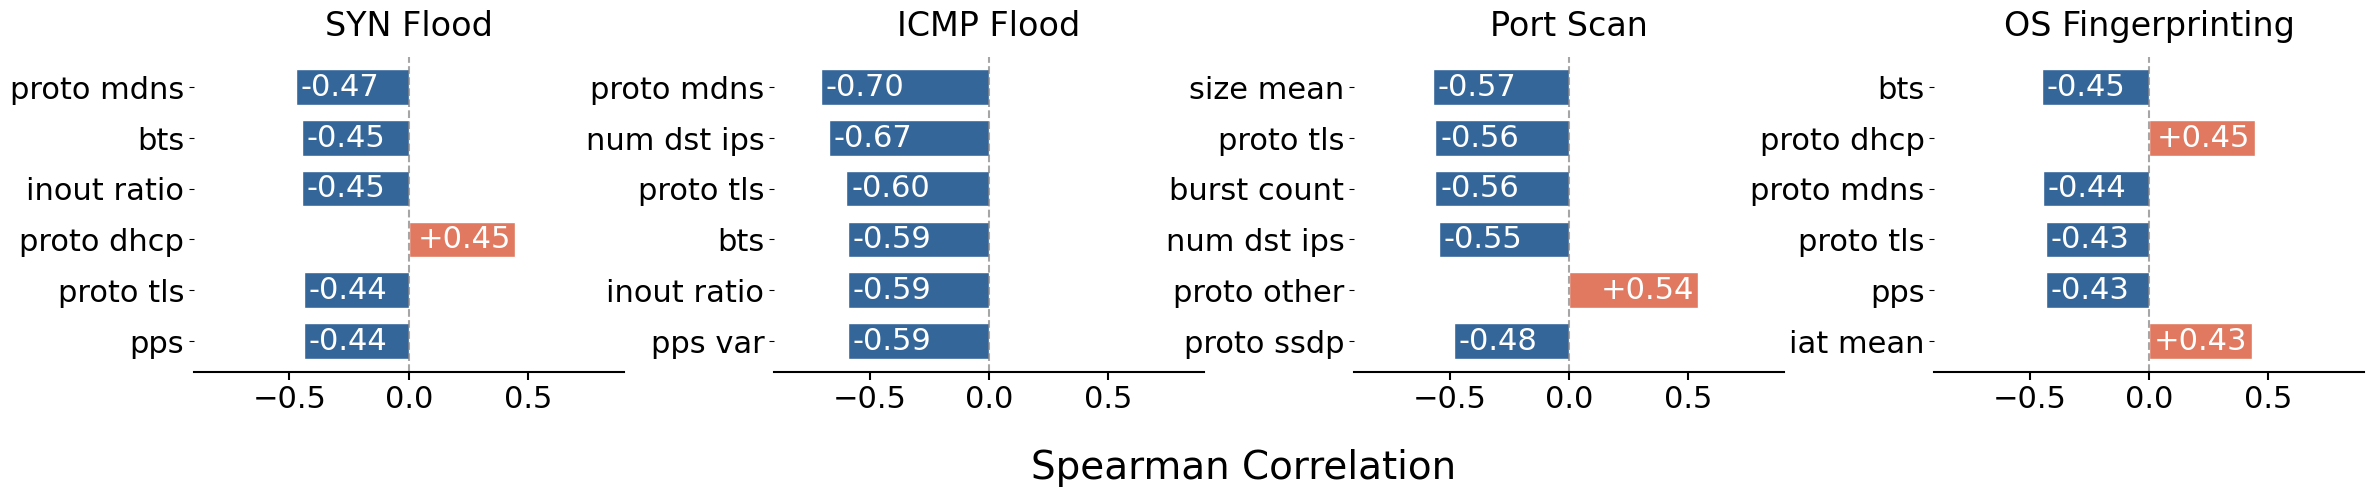

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ====== 1. Set how many top features ======
TOP_K = 6  

# ====== 2. Raw attack correlation dataframes ======
attack_corr_raw = {
    "ICMP Flood": icmp_corr,
    "OS Fingerprinting": os_corr,
    "SYN Flood": syn_corr,
    "Port Scan": scan_corr
}

# specify panel order
attack_order = ["SYN Flood", "ICMP Flood", "Port Scan", "OS Fingerprinting"]

attack_corrs = {}
for attack in attack_order:
    df = attack_corr_raw[attack]
    topk = df.sort_values("abs_r", ascending=False).head(TOP_K)[["feature", "r"]]
    topk["abs_r"] = topk["r"].abs()
    attack_corrs[attack] = topk.reset_index(drop=True)

# ====== 3. Plotting ======
colors = {"neg": "#34669a", "pos": "#e0795f"}
fig, axes = plt.subplots(1, len(attack_order), figsize=(28, 5.0))
axes = axes.flatten()

for idx, (attack, df_corr) in enumerate(attack_corrs.items()):
    ax = axes[idx]

    df_sorted = df_corr.sort_values("abs_r", ascending=False)
    feats = df_sorted["feature"].tolist()
    values = df_sorted["r"].tolist()

    clean_labels = [f.replace("_active", "").replace("_", " ") for f in feats]
    y_pos = np.arange(len(feats))
    bar_colors = [colors["pos"] if v > 0 else colors["neg"] for v in values]

    bars = ax.barh(y_pos, values, color=bar_colors, edgecolor="white", height=0.7)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(clean_labels, fontsize=22)
    ax.set_title(attack, fontsize=24, pad=15)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["bottom"].set_color("black")
    ax.tick_params(axis="x", labelsize=22, length=6, width=1.5)

    ax.axvline(0, color="gray", linewidth=1.5, linestyle="--", alpha=0.7)

    ax.set_xlim(-0.9, 0.9)
    ax.set_ylim(-0.6, len(feats) - 0.4)

    for bar, v in zip(bars, values):
        width = bar.get_width()
        abs_width = abs(width)

        if abs_width > 0.2:
            # inside
            label_x = width - 0.02 if v > 0 else width + 0.02
            align = "right" if v > 0 else "left"
            text_color = "white"
        else:
            # outside
            label_x = width + 0.02 if v > 0 else width - 0.02
            align = "left" if v > 0 else "right"
            text_color = "black"

        ax.text(
            label_x,
            bar.get_y() + bar.get_height() / 2,
            f"{v:+.2f}",
            va="center",
            ha=align,
            fontsize=22,
            color=text_color
        )

    ax.invert_yaxis()

fig.text(0.5, 0.005, "Spearman Correlation", ha="center", fontsize=28)
plt.subplots_adjust(bottom=0.22, wspace=0.35, top=0.85)

plt.savefig("../data/figs/attack_corr_bars_topk.pdf", dpi=300, bbox_inches="tight")
plt.show()


Performance–Traffic Correlation Map
- which traffic characteristics affect the performance of model

Final traffic metrics used:
['pps_idle', 'pps_var_idle', 'size_mean_idle', 'size_var_idle', 'proto_tls_idle', 'proto_mdns_idle', 'proto_ssdp_idle', 'proto_dhcp_idle', 'proto_other_idle', 'inout_ratio_idle', 'num_packets_idle', 'pps_active', 'pps_var_active', 'size_mean_active', 'size_var_active', 'proto_tls_active', 'proto_mdns_active', 'proto_ssdp_active', 'proto_dhcp_active', 'proto_other_active', 'inout_ratio_active', 'num_packets_active', 'bts_idle', 'bts_active']


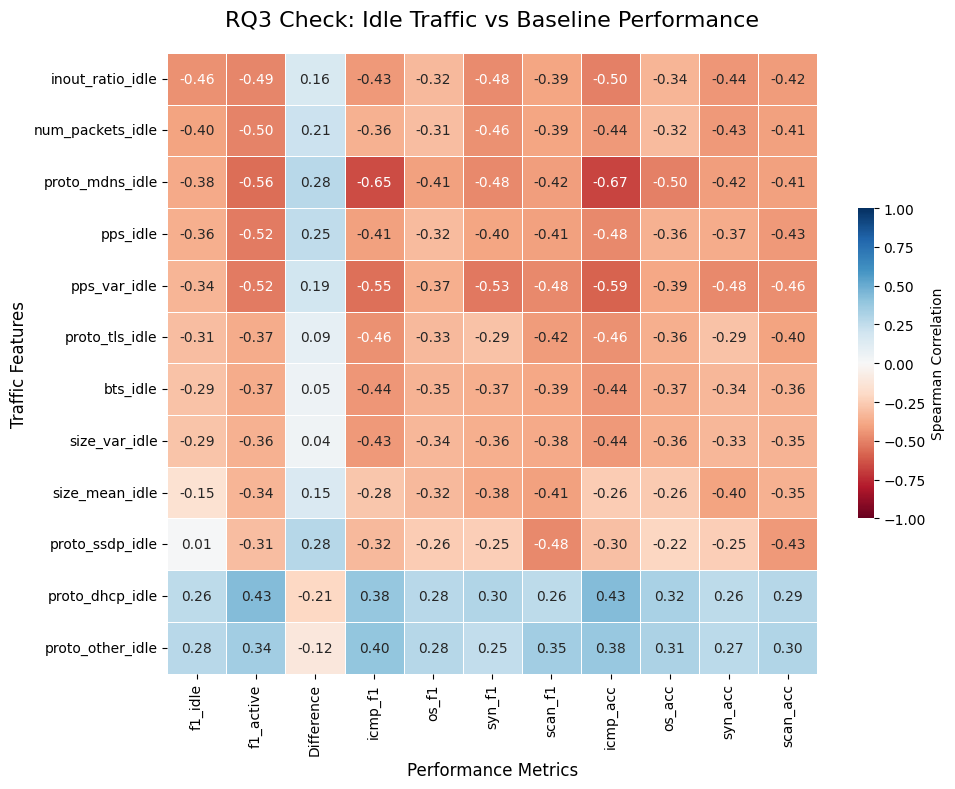

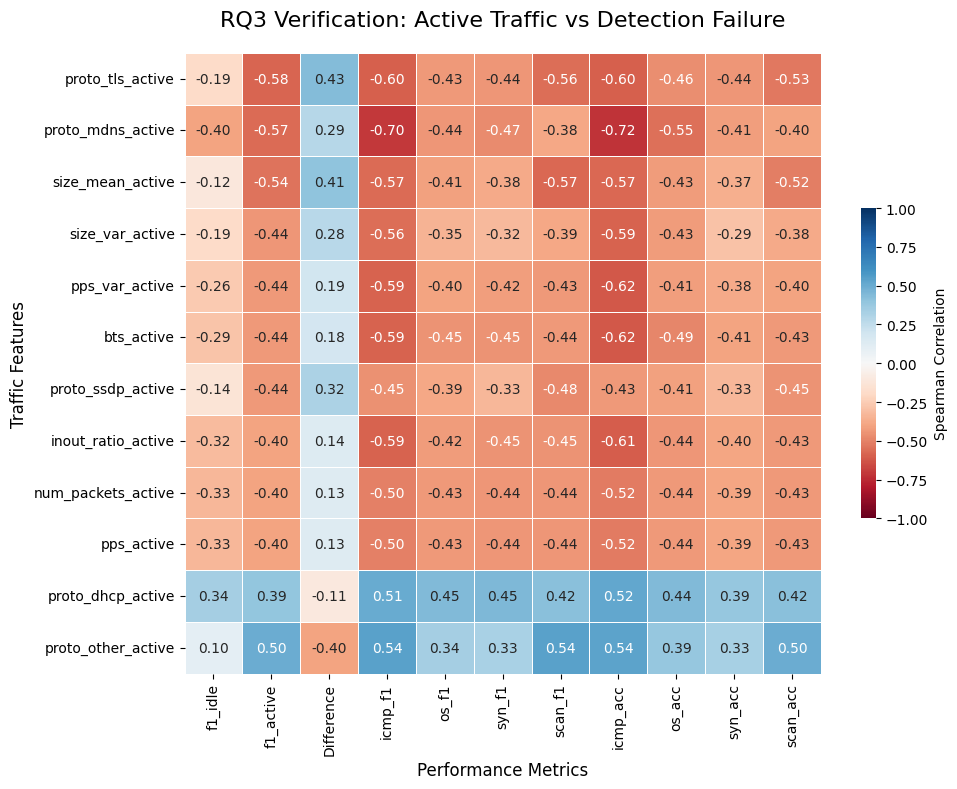

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###############################################################################
# 1. Define performance metrics
###############################################################################

performance_cols = [
    "f1_idle", "f1_active", "Difference",
    "icmp_f1", "os_f1", "syn_f1", "scan_f1",
    "icmp_acc", "os_acc", "syn_acc", "scan_acc"
]

performance_cols = [c for c in performance_cols if c in merged.columns]


###############################################################################
# 2. Identify all numeric traffic metrics using column prefixes
###############################################################################

traffic_prefixes = [
    "pps_", "pps_var_",
    "size_mean_", "size_var_",
    "proto_", 
    "inout_", 
    "num_packets_",
    "bts_"
]

traffic_cols = [
    c for c in merged.columns
    if any(c.startswith(p) for p in traffic_prefixes)
]

###############################################################################
# Convert traffic columns to numeric (strings -> NaN)
###############################################################################

for c in traffic_cols:
    merged[c] = pd.to_numeric(merged[c], errors="coerce")


###############################################################################
# 3. Remove columns that are all NaN or zero variance
###############################################################################

traffic_df = merged[traffic_cols]

# Remove fully NaN columns
traffic_df = traffic_df.dropna(axis=1, how="all")

# Remove zero variance metrics
nonzero_traffic_cols = [
    c for c in traffic_df.columns
    if traffic_df[c].std() > 1e-6
]

print("Final traffic metrics used:")
print(nonzero_traffic_cols)


###############################################################################
# 4. Split into idle and active traffic metrics
###############################################################################

idle_cols = [c for c in nonzero_traffic_cols if c.endswith("_idle")]
active_cols = [c for c in nonzero_traffic_cols if c.endswith("_active")]


###############################################################################
# 5. Build correlation: Spearman (Rank-Based)
###############################################################################

def compute_corr_matrix(row_cols, col_cols):
    # Use Spearman to handle non-linear/logarithmic relationships
    corr_full = merged[row_cols + col_cols].corr(method='spearman')
    return corr_full.loc[row_cols, col_cols]

corr_idle = compute_corr_matrix(idle_cols, performance_cols)
corr_active = compute_corr_matrix(active_cols, performance_cols)

###############################################################################
# 6. Sort rows by strongest predictor of FAILURE (Negative Correlation)
###############################################################################

def sort_by_impact(corr_matrix, target_col="f1_active"):
    # Sort so the features that destroy accuracy (most negative) are at the top
    if target_col in corr_matrix.columns:
        return corr_matrix.sort_values(by=target_col, ascending=True)
    return corr_matrix

# For Active, we want to see what kills Active F1
corr_active_sorted = sort_by_impact(corr_active, "f1_active")
# For Idle, we might check what correlates with Idle F1
corr_idle_sorted = sort_by_impact(corr_idle, "f1_idle")

###############################################################################
# 7. Improved Heatmap
###############################################################################

def plot_heatmap(corr_matrix, title):
    # Dynamic height based on number of features
    height = max(8, len(corr_matrix) * 0.4) 
    plt.figure(figsize=(10, height))
    
    sns.heatmap(
        corr_matrix,
        cmap="RdBu",  # Red=Positive, Blue=Negative (Standard Scientific)
        vmin=-1, vmax=1, center=0,
        linewidths=0.5,
        linecolor='white',
        annot=True,   # See the numbers!
        fmt=".2f",
        cbar_kws={"shrink": 0.5, "label": "Spearman Correlation"}
    )
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Performance Metrics", fontsize=12)
    plt.ylabel("Traffic Features", fontsize=12)
    plt.tight_layout()
    plt.show()

###############################################################################
# 8. Execution
###############################################################################

plot_heatmap(corr_idle_sorted, "RQ3 Check: Idle Traffic vs Baseline Performance")
plot_heatmap(corr_active_sorted, "RQ3 Verification: Active Traffic vs Detection Failure")